# Aula 1: Introdução a Transformers I

- Modelo revolucionario
- usado em GPT-3, T5 e BERT
- Não usa recorrencia como RNN (LSTM)
- Baseado no mecanismo de atenção "ATTENTION"
- Arquitetura ENDEC


---


### Attention / Self Attention
- Aprende a relação contextual entre as palavras
- wor2vec não
- Precisa ser treinado
- Existem modelos pre - treinados


---

### ENDEC: Encode / Decode
- Encoder: coloca a mensagem em um formato que o computador compreenda
- Decoder: Coloca a mensagem de volta ao formato original
- Varios encoders empilhados
- O primeiro encoder: **Positional Encoding**

# ENCODER

#### Positional Encoding
- NLP depende de ordem
- É natural processar em sequencia
- A maioria das tecnicas processam dados que dependem de recorrencia RNN
- Porem, um Transformer submete texto (Embedding) em paralelo
  - Performance e melhoras no aprendizado
- Matriz com as mesmas dimensoes do embedding




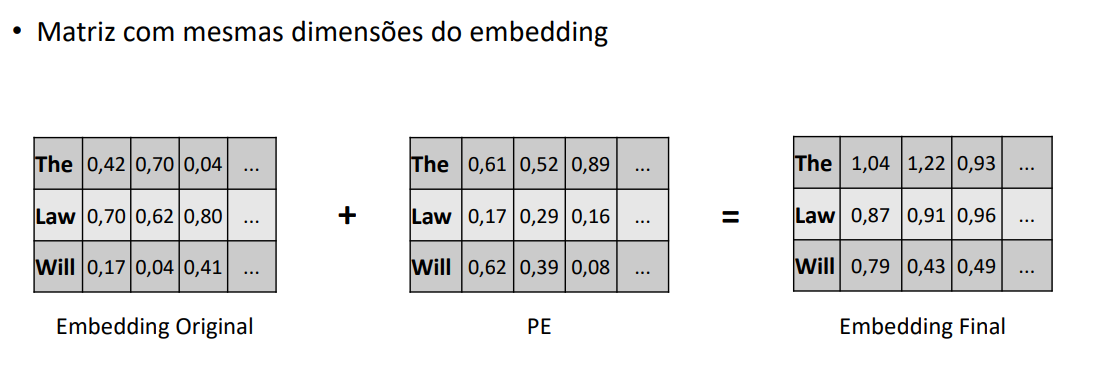

Como a matriz PE é calculada?
- Usa função senoidal
- 'pos' é posiçao da palavra na sentença
- 'i' é a posição no embedding
- Seno quando é par
- Cosseno quando é impar

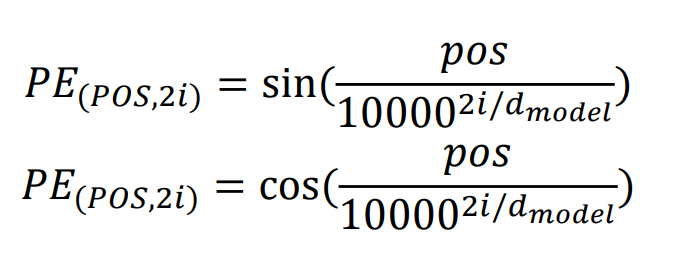

- Cada Encoder tem esses 4 elementos

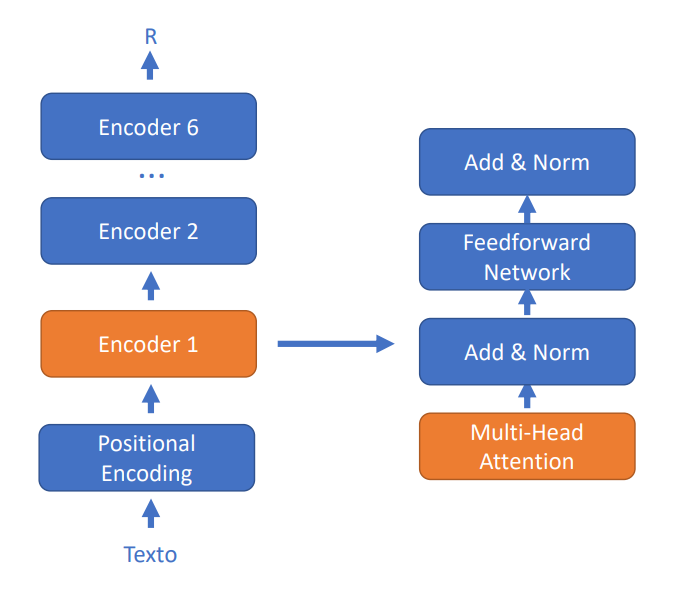

### Self Attention
- A função é descobrir a relação entre as palavras
- O Transformer calcula a representação e a relação de cada palavra
- Self Attention é o resultado do processamento
- Mostra que 'it' tem um peso maior para 'street'
- Como ele descobre a relação?
  -  **5 etapas**

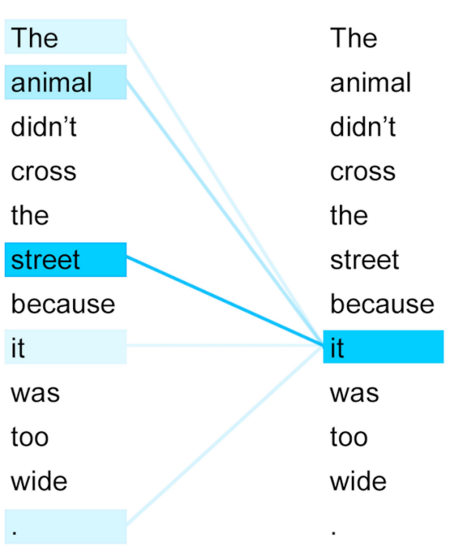

### ETAPAS

### ETAPA 1: Matrizes Q,K,V
- The Animal Didn´t ....
- Produz o Embedding da sentença gerando a matriz X
- Dimensoes de X é o da sentença * tamanho do embedding [3x300]
- Tres novas matrizes ponderadas sao geradas
  - Q: Query matrix
  - K: Key matrix
  - V: Value matrix
- Pesos sao ajustados durante o treinamento

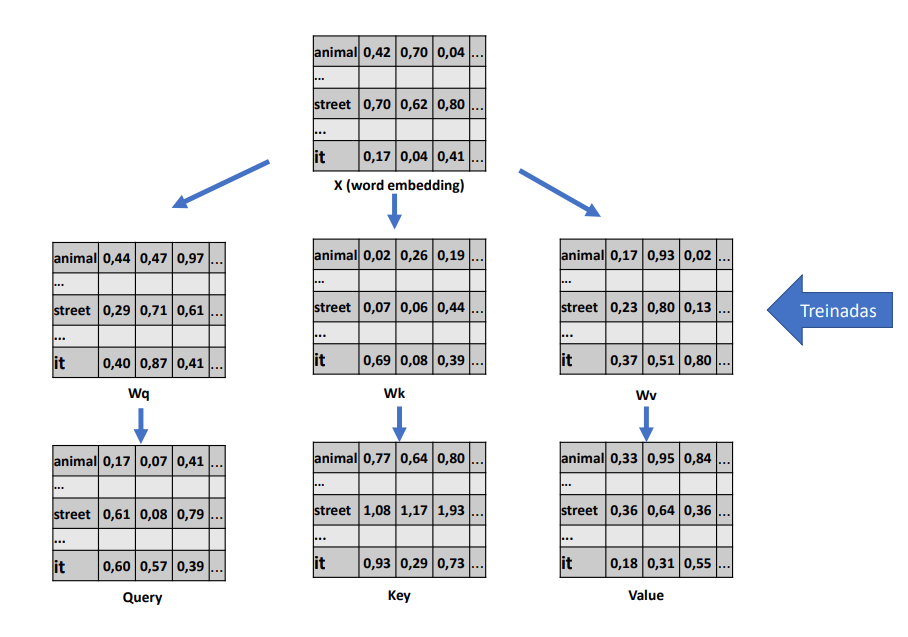

### 2 ETAPA: Produto escalar entre Query e Key

- Mostra o grau de similaridade entre palavras (Score)


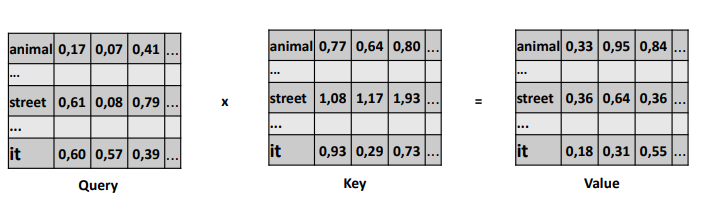

### 3 ETAPA: Dividir QK pela raiz quadrada das dimensoes de Key

- Objetivo: Obter bons gradientes (ajuste dos pesos)


### 4 ETAPA: Produção da Score Matrix
- Normalizaçao entre 0 e 1 com softmax
- Objetivo é gerar um score de relaçao entre as palavras

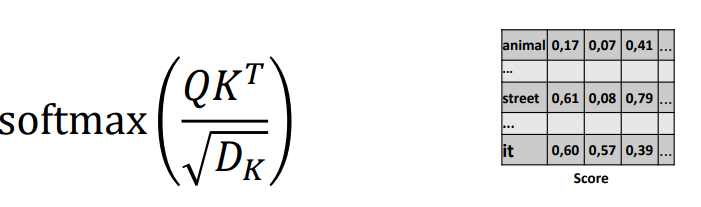

### 5 ETAPA: Calcular a matriz Z (matriz de atenção)

- Calculo é Score Matrix * V
- Cada palavra tera um score: Z1, Z2, Z3
- Mostra o peso da relação entre as palavras
- A matriz Z esta pronta para ser enviadas atraves da proxima camada Feedfoward Network (porem antes sera normalizada)

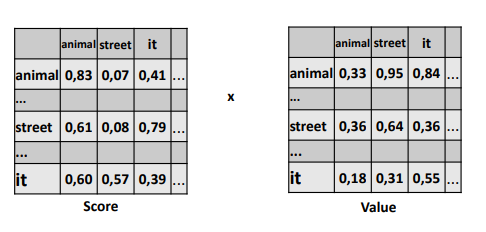

## Multi Attention
- Em vez de 1 processo Attention, multiplos processos sao processados e o resultado é somando
- Aumenta a precisao do sistema
- Todos as matrizes sao concatenadas e multiplicadas por uma matriz ponderada, pois a RNA (rede neural artificial) espera apenas uma matriz

### Add e Norm
- Camada de normalização
- Objetivo é conectar e normalizar
- Conecta a entrada do multi head attention com sua saida
- Conecta a entrada da feedforward com sua saida


### Feedforward Network
- Camada que vai aprender com os dados
- Duas camadas densas com Relu

# Aula 1: Introdução a Transformers II

# DECODER

- Tambem sao camadas empilhadas
- Tambem ocorre a conversao para embedding e positional encoding

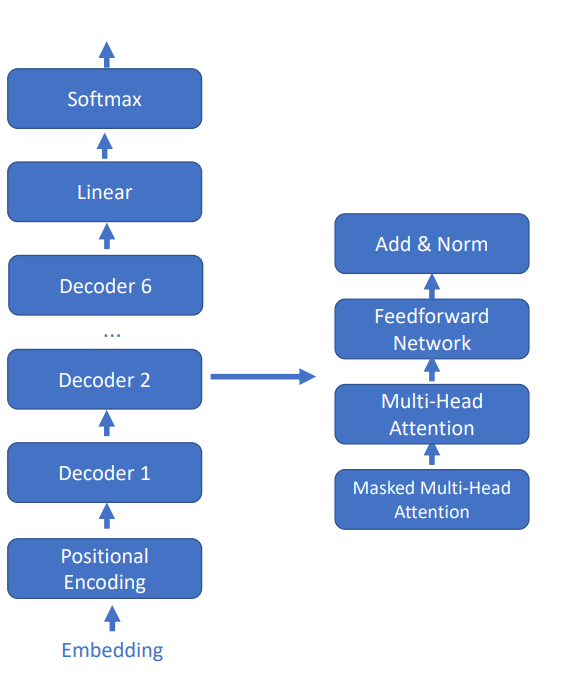

Cada Decoder recebe 2 entradas:
  - decoder anterior
  - a saida do Encoder
- A conexao é com o elemento multi-head attention do decoder

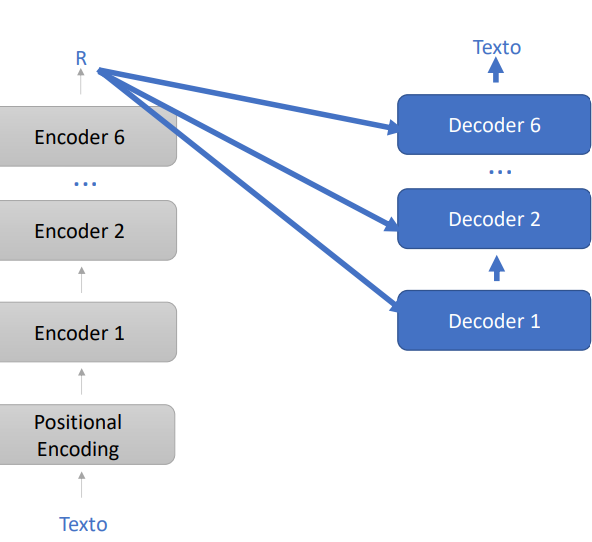

## Masked Multi Head Attention

- <sos> Start of sentence
- <eos> End of sentence
- <sos> + “prever primeira sentença:” The
- <sos> + The “prever próxima:” animal
- <sos> + The + animal + ... + <eos>

- Palavras a direita sao mascaradas, de forma incremental

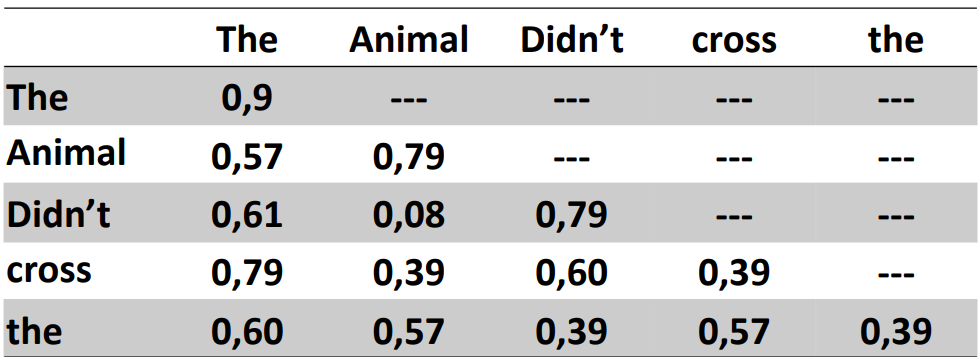

## Camada Linear e Softmax
- Linear produz um vetor com o tamanho do vocabulario
- Softmax produz as probabilidades
- Decoder gera as palavras com maior **probabilidade**